In [1]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [2]:
def detect_objects(image_path):
    """
    Detect objects in an image using YOLOv8.
    
    Args:
        image_path: Path to the input image
    
    Returns:
        Detected objects and class labels.
    """
    # Load YOLO model
    model = YOLO('yolov8l.pt')  # Load the model
    
    # Read image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform detection
    results = model(image_rgb)[0]
    
    # Create a copy of the image for drawing
    annotated_image = image_rgb.copy()
    
    # Generate random colors for classes
    np.random.seed(42)  # For consistent colors
    colors = np.random.randint(0, 255, size=(100, 3), dtype=np.uint8)
    
    # To hold class names and their corresponding colors
    class_labels = {}
    
    # Process detections
    boxes = results.boxes

    return boxes, results.names, annotated_image, colors

In [3]:
def show_results(image_path, confidence_threshold):
    """
    Show original image and detection results side by side.

    Args:
        image_path: Path to the input image
        confidence_threshold: Minimum confidence score for detections
    """
    # Read original image
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    # Get detection results
    boxes, class_names, annotated_image, colors = detect_objects(image_path)
    
    # Process each detected object and apply confidence threshold filtering
    class_labels = {}
    for box in boxes:
        # Get box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        
        # Get confidence score
        confidence = float(box.conf[0])
        
        # Only show detections above confidence threshold
        if confidence > confidence_threshold:
            # Get class id and name
            class_id = int(box.cls[0])
            class_name = class_names[class_id]
            
            # Get color for this class
            color = colors[class_id % len(colors)].tolist()
            
            # Draw bounding box
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), color, 2)
            
            # Store class name and color for legend
            class_labels[class_name] = color

    # Create figure
    plt.figure(figsize=(15, 7))
    
    # Show original image
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')
    
    # Show detection results
    plt.subplot(1, 2, 2)
    plt.title('Detected Objects')
    plt.imshow(annotated_image)
    plt.axis('off')

    # Create legend
    legend_handles = []
    for class_name, color in class_labels.items():
        normalized_color = np.array(color) / 255.0  # Normalize the color
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                                           markerfacecolor=normalized_color, markersize=10))

    plt.legend(handles=legend_handles, loc='upper right', title='Classes')

    plt.tight_layout()
    plt.show()


0: 640x640 1 potted plant, 2 books, 514.4ms
Speed: 0.0ms preprocess, 514.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


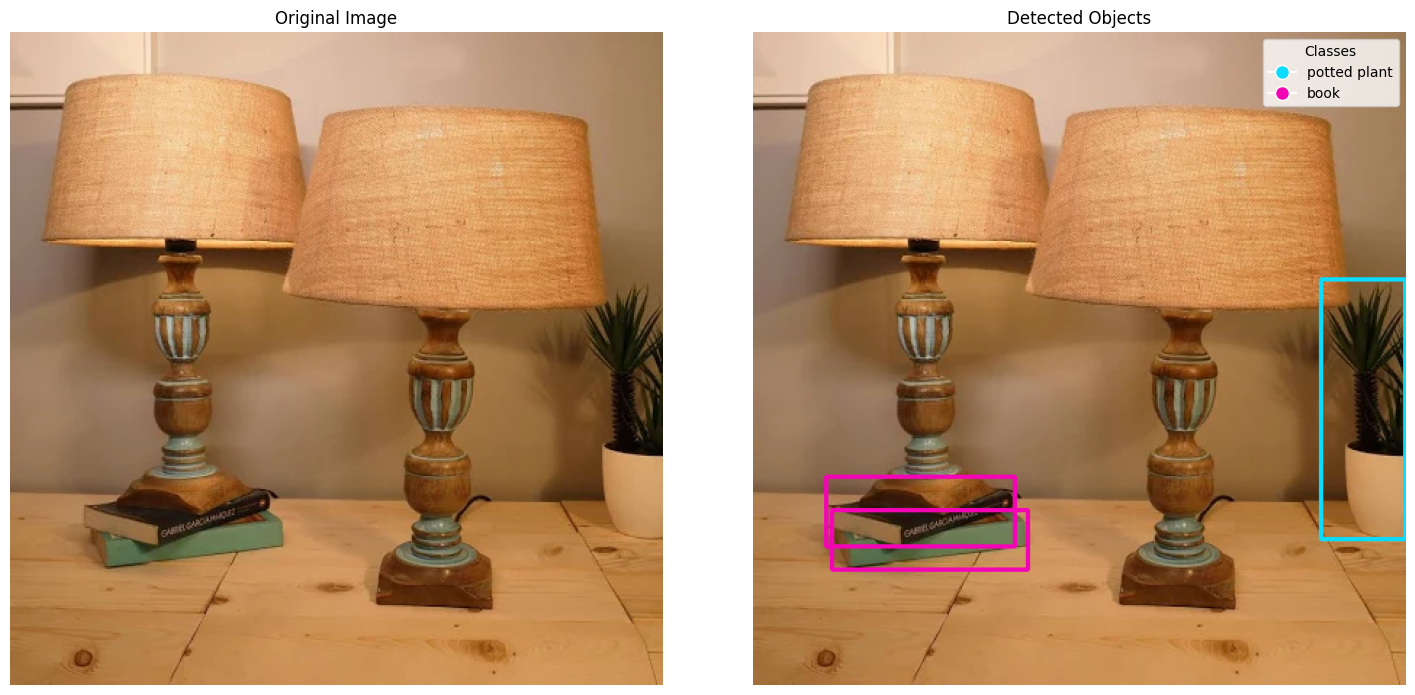

In [4]:
# Example usage:
show_results('./testdata/lamps.webp', confidence_threshold=0.2)